In [1]:
"""
Created on Thu Apr 16 17:25:36 2020

@author: maddalena
"""
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import matplotlib.gridspec as gridspec

In [2]:
# The SIR model differential equations.
def deriv(y, t, N, beta,gamma):
    S,I,R = y

    dSdt = -(beta*I/N)*S 
    dIdt = (beta*S/N)*I - gamma*I 
    dRdt = gamma*I 
    
    return dSdt, dIdt, dRdt

In [3]:
#Integration of the differential equations
    
def time_evo(N,beta,gamma,I0=1,R0=0,t=np.arange(0,365)):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0-R0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N,beta,gamma))
    S, I, R = np.transpose(ret)
    
    return (t,S,I,R)

In [4]:
#Show the result

fin_result=time_evo(1000,0.5,1/14)

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]

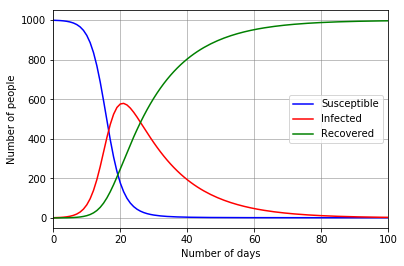

In [5]:
#SIR MODEL PLOT

plt.plot(t, s_vec, 'b', label='Susceptible')
plt.plot(t, i_vec, 'r', label='Infected')
plt.plot(t, r_vec, 'g', label='Recovered')
#plt.plot(t, m_vec, 'k', label='Deaths')
#plt.plot(t, i_vec+r_vec, color='orange',linestyle='--', label='Infected + Recovered')
plt.legend(loc=5)
#plt.yscale('log')
#plt.ylim(0.5,3000)
plt.xlim(0,100)
plt.xlabel('Number of days')
plt.ylabel('Number of people')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
#plt.savefig('plotsir05.png',dpi=300)
plt.show()

In [6]:
#IMPORT FILES WORLD
#i files sono: le righe sono le nazioni, le colonne i giorni del mese (DATE).

file_confirmed='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
file_deaths='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
file_recovered='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

df_confirmed=pd.read_csv(file_confirmed)
df_deaths=pd.read_csv(file_deaths)
df_recovered=pd.read_csv(file_recovered)

In [7]:
#Data manipulation and representation (World)

deaths_world=df_deaths.iloc[:,-1].sum()
recovered_world=df_recovered.iloc[:,-1].sum()
total_world=df_confirmed.iloc[:,-1].sum()

max_death_rate=round(deaths_world/(deaths_world+recovered_world)*100,1)
min_death_rate=round(deaths_world/total_world*100,1)

print('Total contaminated:',total_world)
print('Total deaths:',deaths_world)
print('Total recovered:',recovered_world)

print('Based on the WHO data, the death rate is between',min_death_rate,'% and',max_death_rate,'% of the confirmed case')

Total contaminated: 4996472
Total deaths: 328115
Total recovered: 1897466
Based on the WHO data, the death rate is between 6.6 % and 14.7 % of the confirmed case


In [8]:
def mortality_rate(f_asympt):
    recovered_tot=recovered_world+f_asympt*total_world
    return deaths_world/(deaths_world+recovered_tot)

print(mortality_rate(1)*100)
print(mortality_rate(2)*100)

f_asympt_grid=np.arange(0,2.5,0.1)

4.54323722077365
2.6853896030822053


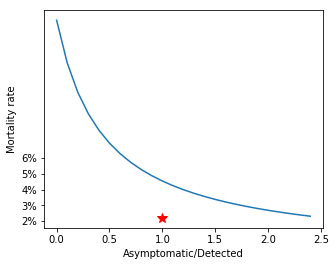

In [9]:
plt.figure(figsize=(5,4))
plt.plot(f_asympt_grid,mortality_rate(f_asympt_grid)*100)
plt.xlabel('Asymptomatic/Detected')
plt.ylabel('Mortality rate')
plt.yticks([1,2,3,4,5,6],['1%','2%','3%','4%','5%','6%'])
plt.plot(1,2.2,marker='*',color='red',markersize=11)
#plt.savefig('mortality_rate_plot.png',dpi=300)
plt.show()

In [10]:
def func_plot(df):
    y_world=[]
    n_cols=df.shape[1]
    #print(n_cols)
    for i in range(n_cols-4):
        y_world.append(df.iloc[:,i+4].sum())
    
    x_world2=df.columns[4:]
    x_world=pd.to_datetime(x_world2,infer_datetime_format=False)
    
    return (x_world,y_world)

peppe=func_plot(df_confirmed)

In [11]:
######## INPUT PARAMETERS ########
country='Italy'
t0=pd.to_datetime('2020-01-22')
#################################

mask_coun=df_confirmed['Country/Region']==country   # you can change the country here
mask_coun_rec=df_recovered['Country/Region']==country

df_confirmed_coun=df_confirmed.loc[mask_coun,:]
df_deaths_coun=df_deaths.loc[mask_coun,:]
df_recovered_coun=df_recovered.loc[mask_coun_rec,:]

#somma tutte le ultime colonne (cioè valori dell'ultimo giorno) 
#dei 3 files, deaths, recovered, confirmed, per avere il TOT mondiale 
deaths_world_coun=df_deaths_coun.iloc[:,-1].sum()
recovered_world_coun=df_recovered_coun.iloc[:,-1].sum()
total_world_coun=df_confirmed_coun.iloc[:,-1].sum()

max_death_rate_coun=round(deaths_world_coun/(deaths_world_coun+recovered_world_coun)*100,1)
min_death_rate_coun=round(deaths_world_coun/total_world_coun*100,1)

print('Total contaminated:',country,total_world_coun)
print('Total deaths',country,deaths_world_coun)
print('Total recovered ',country,recovered_world_coun)

print('Based on the WHO data, the death rate in',country,'is between',min_death_rate_coun,'% and',max_death_rate_coun,'% of the total confirmed case')

Total contaminated: Italy 227364
Total deaths Italy 32330
Total recovered  Italy 132282
Based on the WHO data, the death rate in Italy is between 14.2 % and 19.6 % of the total confirmed case


/Users/luigigiuseppeatzeni/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


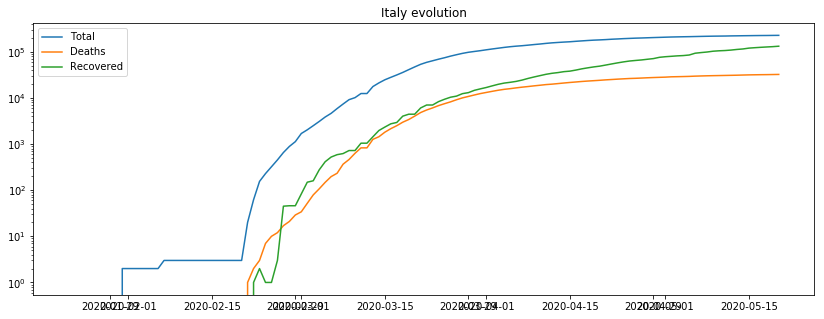

In [12]:
plt.figure(figsize=(14,5))
plt.plot(func_plot(df_confirmed_coun)[0],func_plot(df_confirmed_coun)[1],label='Total')
plt.plot(func_plot(df_deaths_coun)[0],func_plot(df_deaths_coun)[1],label='Deaths')
plt.plot(func_plot(df_recovered_coun)[0],func_plot(df_recovered_coun)[1],label='Recovered')
plt.legend()
plt.yscale('log')
plt.title(country+' evolution')
#plt.savefig('country_plot.png',dpi=300)
plt.show()

In [13]:
ytot=np.array(func_plot(df_confirmed_coun)[1])
ydeaths=np.array(func_plot(df_deaths_coun)[1])
yrec=np.array(func_plot(df_recovered_coun)[1])

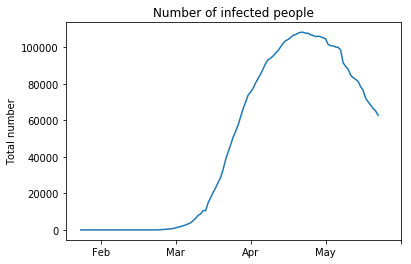

In [14]:
plt.plot(ytot-ydeaths-yrec)
#plt.yscale('log')
plt.xticks(np.arange(8,130,30),['Feb','Mar','Apr','May'])
plt.ylabel('Total number')
plt.title('Number of infected people')
#plt.savefig('activegermany.png',dpi=300)
plt.show()

In [15]:
#Generalization to other countries

def whichcountry(name):
        
    ######## INPUT PARAMETERS ########
    country=name
    t0=pd.to_datetime('2020-01-22')
    #################################

    mask_coun=df_confirmed['Country/Region']==country   # you can change the country here
    mask_coun_rec=df_recovered['Country/Region']==country

    df_confirmed_C=df_confirmed.loc[mask_coun,:]
    df_deaths_C=df_deaths.loc[mask_coun,:]
    df_recovered_C=df_recovered.loc[mask_coun_rec,:]

    ytot=np.array(func_plot(df_confirmed_C)[1])
    ydeaths=np.array(func_plot(df_deaths_C)[1])
    yrec=np.array(func_plot(df_recovered_C)[1])

    return ytot-ydeaths-yrec, ytot[-1], yrec[-1],ydeaths[-1]

In [16]:
print(whichcountry('Italy')[0])#confirmed last day
print(whichcountry('Italy')[2])#recovered last day

[     0      0      0      0      0      0      0      0      0      2
      2      2      2      2      2      2      3      3      3      3
      3      3      3      3      3      3      3      3      3      3
     19     59    150    221    311    438    593    821   1053   1577
   1835   2263   2706   3296   3916   5061   6387   7985   8794  10590
  10590  14955  17750  20603  23073  26062  28710  33190  38549  42681
  46638  50826  54030  57521  62013  66414  70065  73880  75528  77635
  80572  83049  85388  88274  91246  93187  94067  95262  96877  98273
 100269 102253 103616 104291 105418 106607 106962 107771 108257 108237
 107709 107699 106848 106527 105847 106103 105813 105205 104657 101551
 100943 100704 100179  99980  98467  91528  89624  87961  84842  83324
  82488  81266  78457  76440  72070  70187  68351  66553  65129  62752]
132282


In [17]:
#definition of time
df_time=pd.to_datetime(np.arange(len(ytot)),unit='D',origin=pd.Timestamp('2020-01-22'))

# list of top countries , with the higher number of cases

df_nofcases=pd.DataFrame(np.array(df_confirmed.iloc[:,1]))
df_nofcases.columns=['Country']
df_nofcases['Confirmed']=df_confirmed.iloc[:,-1]

df_nofcases
#np.array(df_nofcases.sort_values(by='Confirmed',ascending=False).head(6)['Country'])

,Country,Confirmed
0,Afghanistan,8145
1,Albania,964
2,Algeria,7542
3,Andorra,762
4,Angola,52
5,Antigua and Barbuda,25
6,Argentina,9283
7,Armenia,5271
8,Australia,107
9,Australia,3082


In [18]:
countries_list=['Albania',
                'Armenia',
                'Austria',
                'Azerbaijan',
                'Belarus',
                'Belgium',
                'Bosnia and Herzegovina',
                'Bulgaria',
                'Cyprus',
                'Croatia',
                'Czechia',
                'Denmark',
                'Estonia',
                'Finland',
                'France',
                'Georgia',
                'Germany',
                'Greece',
                'Hungary',
                'Iceland',
                'Ireland',
                'Israel',
                'Italy',
                'Kazakhstan',
                'Kyrgyzstan',
                'Latvia',
                'Lithuania',
                'Luxembourg',
                'Malta',
                'Moldova',
                'Monaco',
                'Montenegro',
                'Netherlands',
                'North Macedonia',
                'Norway',
                'Poland',
                'Portugal',
                'Romania',
                'Serbia',
                'Slovakia',
                'Slovenia',
                'Spain',
                'Sweden',
                'Switzerland',
                'Turkey',
                'Ukraine',
                'United Kingdom']

In [19]:
df_active=pd.DataFrame(whichcountry(countries_list[0])[0])
df_active.columns=[countries_list[0]]
df_active.index=df_time

for i in range(0,len(countries_list)):
    df_active[countries_list[i]]=whichcountry(countries_list[i])[0]

df_active.columns=['Albania',
                'Armenia',
                'Austria',
                'Azerbaijan',
                'Belarus',
                'Belgium',
                'Bosnia and Herzegovina',
                'Bulgaria',
                'Cyprus',
                'Croatia',
                'Czechia',
                'Denmark',
                'Estonia',
                'Finland',
                'France',
                'Georgia',
                'Germany',
                'Greece',
                'Hungary',
                'Iceland',
                'Ireland',
                'Israel',
                'Italy',
                'Kazakhstan',
                'Kyrgyzstan',
                'Latvia',
                'Lithuania',
                'Luxembourg',
                'Malta',
                'Moldova',
                'Monaco',
                'Montenegro',
                'Netherlands',
                'North Macedonia',
                'Norway',
                'Poland',
                'Portugal',
                'Romania',
                'Serbia',
                'Slovakia',
                'Slovenia',
                'Spain',
                'Sweden',
                'Switzerland',
                'Turkey',
                'Ukraine',
                'United Kingdom']
print(df_active[-1:])

            Albania  Armenia  Austria  Azerbaijan  Belarus  Belgium  \
2020-05-20      175     2785      838        1335    20832    31986   

            Bosnia and Herzegovina  Bulgaria  Cyprus  Croatia  ...  Romania  \
2020-05-20                     645      1492     389      160  ...     5884   

            Serbia  Slovakia  Slovenia  Spain  Sweden  Switzerland  Turkey  \
2020-05-20    5531       237        23  54291   22721          966   34378   

            Ukraine  United Kingdom  
2020-05-20    12711          212717  

[1 rows x 47 columns]


In [20]:
print(df_active['Germany'])

2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
2020-01-27        1
2020-01-28        4
2020-01-29        4
2020-01-30        4
2020-01-31        5
2020-02-01        8
2020-02-02       10
2020-02-03       12
2020-02-04       12
2020-02-05       12
2020-02-06       12
2020-02-07       13
2020-02-08       13
2020-02-09       14
2020-02-10       14
2020-02-11       16
2020-02-12       16
2020-02-13       15
2020-02-14       15
2020-02-15       15
2020-02-16       15
2020-02-17       15
2020-02-18        4
2020-02-19        4
2020-02-20        4
              ...  
2020-04-21    48058
2020-04-22    45969
2020-04-23    44254
2020-04-24    39439
2020-04-25    40836
2020-04-26    39794
2020-04-27    38132
2020-04-28    36198
2020-04-29    34672
2020-04-30    32886
2020-05-01    30441
2020-05-02    29155
2020-05-03    28198
2020-05-04    26459
2020-05-05    24914
2020-05-06    20987
2020-05-07    20338
2020-05-08    21378
2020-05-09    20475


In [21]:
df_active.to_csv('active_infected',index=True)

In [22]:
data = pd.read_csv('active_infected')
#print(data['Italy'])

In [23]:
xdata=pd.to_numeric(range(data.shape[0]))
print(xdata)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]


In [24]:
n_countries = len(countries_list)

In [25]:
today=len(xdata)

In [26]:
array_country=whichcountry('Italy')[0]

def minimizer(R0,t1=today-5,t2=today):
    array_country_bis=array_country
    
    #true data
    ydata_inf_2=array_country[t1:t2]
    xdata_2=np.arange(0,len(ydata_inf_2))
    
    #model
    fin_result=time_evo(60*10**6,1/14*R0,1/14,I0=ydata_inf_2[0])
    i_vec=fin_result[2]
    i_vec_2=i_vec[0:len(xdata_2)]
    
    #average error
    error=np.sum(np.abs(ydata_inf_2-i_vec_2)/ydata_inf_2)*100
    return error

minimizer_vec=np.vectorize(minimizer)

In [27]:
#definition of the ideal r0

xgrid=np.arange(0.01,1.3,0.01)
ygrid=minimizer_vec(xgrid)#calcola per la prima
r0_ideal=round(xgrid[np.argmin(ygrid)],2)

In [28]:
#time(minimizer_vec(xgrid))

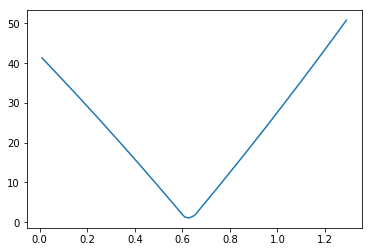

0.63


In [29]:
plt.plot(xgrid,ygrid)
plt.show()
print(r0_ideal)

In [30]:
time_window=5

def minimizer_gen(t1,t2,xgrid=np.arange(0.1,5,0.01)):

    ygrid=minimizer_vec(xgrid,t1=t1,t2=t2)
    r0_ideal=round(xgrid[np.argmin(ygrid)],2)

    return r0_ideal

In [31]:
print(whichcountry(countries_list[0])[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   2  10  11  22  32  37  41
  50  54  57  62  68  72  85  98 108 124 151 147 156 169 168 176 177 185
 198 214 237 240 230 224 221 211 213 206 212 203 218 215 230 220 222 231
 238 251 251 257 282 288 286 289 281 272 263 239 233 229 219 206 206 199
 198 187 187 163 161 173 180 188 200 190 176 175]


In [32]:
r0_time=[]
scangrid=np.linspace(0,5,100)
array_country=whichcountry(countries_list[0])[0] #inizializzo

for name in range(0, len(countries_list)):
    print(countries_list[name],array_country)
    
    for i in range(0,today-(time_window-1)):
        min_val=minimizer_gen(i,i+time_window,scangrid)
        r0_time.append(min_val)
        scangrid=np.linspace(0,min_val+5,200)
        print(i,min_val)
        
    array_country=whichcountry(countries_list[name+1])[0]

Albania [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   2  10  11  22  32  37  41
  50  54  57  62  68  72  85  98 108 124 151 147 156 169 168 176 177 185
 198 214 237 240 230 224 221 211 213 206 212 203 218 215 230 220 222 231
 238 251 251 257 282 288 286 289 281 272 263 239 233 229 219 206 206 199
 198 187 187 163 161 173 180 188 200 190 176 175]
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0


/Users/luigigiuseppeatzeni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 5.0
48 5.58
49 6.49
50 3.93
51 2.83
52 2.52
53 2.53
54 2.01
55 2.01
56 2.22
57 2.47
58 2.63
59 2.91
60 2.78
61 2.42
62 2.42
63 2.09
64 1.39
65 1.64
66 1.5
67 1.27
68 1.45
69 1.56
70 1.88
71 1.97
72 1.89
73 1.32
74 0.76
75 0.55
76 0.73
77 0.72
78 0.75
79 0.87
80 0.97
81 1.17
82 1.18
83 1.4
84 1.06
85 1.19
86 1.03
87 1.36
88 1.5
89 1.37
90 1.38
91 1.47
92 1.46
93 1.49
94 1.11
95 0.89
96 0.77
97 0.55
98 0.33
99 0.29
100 0.35
101 0.59
102 0.56
103 0.5
104 0.58
105 0.76
106 0.67
107 0.57
108 0.28
109 0.32
110 0.64
111 1.47
112 1.76
113 1.56
114 1.25
115 0.75
Armenia [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0  

/Users/luigigiuseppeatzeni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 5.0
40 10.0
41 10.25
42 8.81
43 7.36
44 4.66
45 3.16
46 3.03
47 2.82
48 4.28
49 4.66
50 5.87
51 3.93
52 3.72
53 3.37
54 3.36
55 3.44
56 3.65
57 3.48
58 2.81
59 2.86
60 2.49
61 3.09
62 3.58
63 3.66
64 3.18
65 3.21
66 2.35
67 1.96
68 1.85
69 1.96
70 2.03
71 1.94
72 1.81
73 1.61
74 1.63
75 1.6
76 1.56
77 1.62
78 1.53
79 1.44
80 1.49
81 1.47
82 1.5
83 1.63
84 1.3
85 1.36
86 1.41
87 1.42
88 1.39
89 1.28
90 1.26
91 1.29
92 1.3
93 1.2
94 1.15
95 1.14
96 1.11
97 1.07
98 1.07
99 1.07
100 1.07
101 1.07
102 1.04
103 1.03
104 1.03
105 1.12
106 1.11
107 1.11
108 1.07
109 1.07
110 1.04
111 1.0
112 1.06
113 1.07
114 1.07
115 1.07
Bosnia and Herzegovina [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    2    2    

6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 5.0
37 7.44
38 4.25
39 4.56
40 7.11
41 5.72
42 5.12
43 6.56
44 4.12
45 9.12
46 11.0
47 8.84
48 6.19
49 3.94
50 2.61
51 1.68
52 1.95
53 2.13
54 2.26
55 2.23
56 2.11
57 1.97
58 1.75
59 1.76
60 1.83
61 2.02
62 2.08
63 2.06
64 2.06
65 2.02
66 2.05
67 0.78
68 0.38
69 0.38
70 1.97
71 2.21
72 2.1
73 2.07
74 1.95
75 1.68
76 1.51
77 1.24
78 1.13
79 0.92
80 0.86
81 0.8
82 0.61
83 0.54
84 0.19
85 0.05
86 0.15
87 0.23
88 0.21
89 0.03
90 0.35
91 0.83
92 1.03
93 1.06
94 0.85
95 0.71
96 0.69
97 0.6
98 0.73
99 0.78
100 0.84
101 0.94
102 0.72
103 0.46
104 0.38
105 0.41
106 0.54
107 0.45
108 0.49
109 0.28
110 0.13
111 0.36
112 0.11
113 0.21
114 0.31
115 0.45
Estonia [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0   

73 1.07
74 0.64
75 0.34
76 0.72
77 1.01
78 1.09
79 0.8
80 0.64
81 0.54
82 0.5
83 0.61
84 0.59
85 0.62
86 0.71
87 0.49
88 0.39
89 0.27
90 0.42
91 0.46
92 0.47
93 0.82
94 0.44
95 0.36
96 0.3
97 0.24
98 0.21
99 0.24
100 0.34
101 0.27
102 0.0
103 0.0
104 0.28
105 0.82
106 0.91
107 0.45
108 0.47
109 0.38
110 0.27
111 0.32
112 0.32
113 0.43
114 0.38
115 0.54
Greece [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    1    3    4    4    7    7    7
    9   31   45   46   73   73   89   98   98  189  217  319  319  374
  405  404  470  498  590  659  694  763  830  886  977 1066 1117 1213
 1313 1430 1472 1527 1584 1407 1482 1532 1599 1650 1719 1747 1777 1800
 1821 1833 1847 1856 1853 1860 1703 1710 1761 1783 1799 1806 1821 1851
 1860 1077 1098 1103 1108 1112 1122 1142 1156 1167 1185 1191 1201 1218
 1231 1240 1276 1283 1297 1297 1301 1310]
0 0.0
1 0.0
2 0.0
3 0.0
4 0.

6 0.0
7 0.0
8 0.0
9 1.01
10 1.0
11 0.99
12 0.99
13 2.41
14 2.42
15 2.87
16 0.99
17 0.99
18 0.99
19 0.99
20 0.99
21 0.99
22 0.99
23 0.99
24 0.99
25 0.99
26 0.99
27 0.99
28 0.99
29 5.99
30 10.82
31 8.74
32 6.01
33 5.59
34 5.48
35 5.37
36 5.0
37 4.57
38 4.57
39 3.56
40 3.7
41 3.63
42 3.95
43 4.09
44 4.29
45 3.59
46 3.24
47 2.98
48 3.45
49 3.35
50 4.11
51 3.02
52 2.78
53 2.66
54 2.69
55 2.74
56 2.84
57 2.6
58 2.29
59 2.09
60 2.0
61 1.93
62 1.92
63 1.91
64 1.81
65 1.61
66 1.49
67 1.4
68 1.45
69 1.46
70 1.43
71 1.42
72 1.42
73 1.29
74 1.2
75 1.18
76 1.21
77 1.25
78 1.26
79 1.26
80 1.2
81 1.15
82 1.11
83 1.14
84 1.11
85 1.07
86 1.04
87 1.0
88 0.96
89 0.96
90 0.96
91 0.93
92 0.95
93 0.96
94 0.99
95 0.93
96 0.83
97 0.82
98 0.82
99 0.94
100 0.96
101 0.9
102 0.62
103 0.51
104 0.47
105 0.66
106 0.68
107 0.71
108 0.77
109 0.72
110 0.63
111 0.48
112 0.5
113 0.47
114 0.63
115 0.62
Kazakhstan [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    

8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 3.39
46 3.46
47 5.53
48 4.66
49 5.24
50 6.59
51 5.18
52 3.63
53 4.29
54 3.78
55 3.4
56 4.18
57 3.55
58 2.96
59 3.04
60 2.42
61 1.94
62 2.09
63 1.57
64 1.55
65 1.61
66 1.59
67 1.92
68 2.09
69 1.85
70 1.58
71 1.62
72 1.76
73 2.0
74 2.25
75 2.26
76 1.68
77 2.01
78 1.2
79 1.09
80 0.95
81 1.26
82 0.91
83 0.77
84 0.52
85 0.72
86 0.57
87 0.45
88 0.52
89 0.0
90 0.0
91 0.0
92 0.0
93 0.0
94 0.0
95 0.0
96 0.0
97 0.0
98 0.0
99 0.0
100 0.8
101 0.35
102 0.38
103 0.41
104 0.38
105 0.24
106 0.26
107 0.93
108 1.46
109 1.82
110 1.23
111 1.6
112 2.22
113 1.96
114 2.59
115 1.64
Moldova [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0

6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 5.0
36 10.0
37 7.61
38 4.56
39 6.05
40 6.16
41 6.67
42 5.51
43 4.07
44 4.42
45 5.68
46 5.85
47 6.76
48 4.9
49 3.53
50 3.56
51 2.37
52 2.37
53 2.22
54 2.25
55 2.26
56 2.48
57 2.41
58 2.46
59 2.4
60 2.19
61 2.17
62 2.16
63 2.23
64 2.11
65 1.75
66 1.66
67 1.57
68 1.65
69 1.64
70 1.6
71 1.46
72 1.43
73 1.32
74 1.3
75 1.23
76 1.16
77 1.24
78 1.22
79 1.19
80 1.15
81 1.14
82 1.17
83 1.21
84 1.19
85 1.12
86 1.14
87 1.11
88 1.14
89 1.14
90 1.17
91 1.09
92 1.1
93 1.07
94 1.1
95 1.1
96 1.1
97 1.07
98 1.07
99 1.07
100 1.07
101 1.1
102 1.1
103 1.07
104 1.07
105 1.07
106 1.04
107 1.03
108 1.03
109 1.03
110 1.03
111 1.03
112 1.03
113 1.03
114 1.03
115 1.03
Poland [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0  

68 2.13
69 1.93
70 1.71
71 1.65
72 1.84
73 1.96
74 2.24
75 2.07
76 1.92
77 1.25
78 1.26
79 1.13
80 1.02
81 1.03
82 1.91
83 1.67
84 1.94
85 1.53
86 1.25
87 1.32
88 1.14
89 1.3
90 1.3
91 1.11
92 0.74
93 0.84
94 0.85
95 0.59
96 0.45
97 0.33
98 0.48
99 0.52
100 0.22
101 0.34
102 0.19
103 0.0
104 0.13
105 0.0
106 0.0
107 0.5
108 0.44
109 0.0
110 0.0
111 0.0
112 0.1
113 0.38
114 0.46
115 0.25
Slovenia [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    2    7    7   16   16   31   57   89  141  180  218  252  274
  274  285  340  382  412  439  476  513  546  613  665  709  735  777
  816  810  844  876  890  889  921  931  953  978  990 1002 1005 1012
 1022 1033 1064 1057 1064 1065 1070 1069 1076 1082 1088 1093 1098 1099
 1099 1105 1109 1106 1102 1101 1103 1103 1103 1098 1098 1099 1102 1100
 1100 1094 1092 1090 1089   27   

73 2.57
74 2.55
75 2.54
76 2.46
77 2.4
78 2.34
79 2.14
80 1.94
81 1.81
82 1.75
83 1.66
84 1.54
85 1.48
86 1.47
87 1.46
88 1.46
89 1.33
90 1.11
91 0.98
92 0.84
93 0.7
94 0.6
95 0.51
96 0.5
97 0.5
98 0.47
99 0.36
100 0.27
101 0.19
102 0.18
103 0.21
104 0.31
105 0.4
106 0.49
107 0.44
108 0.44
109 0.44
110 0.57
111 0.7
112 0.8
113 0.82
114 0.82
115 0.82
Ukraine [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     1     1     1     1     1     1     1
     1     1     1     2     2     2     6    12    12    14    26    43
    69    69    93   139   190   300   342   459   527   618   761   856
  1023  1168  1243  1253  1389  1581  1790  2073  2359  2605  2912  3155
  3513  3859  4291  4698  4961  5200  5597  5994  6479  6664  7142  7568
  7925  8179  8513  8907  9176  9634 10077 10409 10506 1

IndexError: list index out of range

In [33]:
r0_countries0=np.transpose(np.reshape(r0_time, (len(countries_list),today-(time_window-1))))
#print(r0_countries0)

In [34]:
r0_countries_tot=pd.DataFrame(r0_countries0,index=pd.to_datetime(np.arange(len(r0_countries0)),unit='D',origin='2020-01-26'))

r0_countries_tot.columns   = ['Albania',
                'Armenia',
                'Austria',
                'Azerbaijan',
                'Belarus',
                'Belgium',
                'Bosnia and Herzegovina',
                'Bulgaria',
                'Cyprus',
                'Croatia',
                'Czechia',
                'Denmark',
                'Estonia',
                'Finland',
                'France',
                'Georgia',
                'Germany',
                'Greece',
                'Hungary',
                'Iceland',
                'Ireland',
                'Israel',
                'Italy',
                'Kazakhstan',
                'Kyrgyzstan',
                'Latvia',
                'Lithuania',
                'Luxembourg',
                'Malta',
                'Moldova',
                'Monaco',
                'Montenegro',
                'Netherlands',
                'North Macedonia',
                'Norway',
                'Poland',
                'Portugal',
                'Romania',
                'Serbia',
                'Slovakia',
                'Slovenia',
                'Spain',
                'Sweden',
                'Switzerland',
                'Turkey',
                'Ukraine',
                'United Kingdom']
print(r0_countries_tot['Germany'].tail())

2020-05-16    0.32
2020-05-17    0.32
2020-05-18    0.43
2020-05-19    0.38
2020-05-20    0.54
Name: Germany, dtype: float64


In [35]:
r0_countries_tot.to_csv('r0_countries.csv',index=True)

In [ ]:
r0_countries_imp = pd.read_csv('r0_countries_no_ita.csv')

In [ ]:
print(r0_countries_imp['Germany'].shape)

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(r0_countries_imp['United Kingdom'])
plt.plot(r0_countries_imp['Germany'])
plt.plot(r0_countries_imp['France'])
plt.plot(r0_countries_imp['Spain'])
plt.plot(r0_countries_imp['Denmark'])
plt.plot(r0_countries_imp['Albania'])
plt.plot(r0_countries_imp['Belarus'])
plt.plot(r0_countries_imp['Sweden'])
plt.xticks(np.arange(0-(time_window-5),93,7),['Jan 26','Jan 2','Feb 9','Feb 16','Feb 23','Mar 1','Mar 8', 'Mar 15', 'Mar 22', 'Mar 29', 'Apr 5', 'Apr 12', 'Apr 19', 'Apr 26'],rotation=20)
plt.xlim(48,52)#today)
plt.ylabel('$R_0$')
plt.ylim(0,9)
plt.grid()
plt.title('Evolution of $R_0$')
#plt.savefig('output_countries/r0-evo_Italy.png',dpi=300)
plt.show()

In [ ]:
r0_file_cut_df=pd.DataFrame(r0_countries_imp.iloc[33:len(r0_countries_imp),:])
#index=range(len(r0_countries_imp)-30))
print(r0_file_cut_df.shape)
#print(r0_file_cut_df)

In [ ]:
andrea_columns=pd.read_csv('https://raw.githubusercontent.com/vincnardelli/covid19-italia/master/nazionale/output/r0.csv')
df_andrea_columns = pd.DataFrame(andrea_columns, )
df_andrea_columns.columns = ['Data','Italy']
dataITA=df_andrea_columns['Italy']
print(df_andrea_columns)

In [156]:
list_andrea_col=np.array([])
for i in range(len(df_andrea_columns)):
    list_andrea_col = np.append(list_andrea_col, df_andrea_columns['Italy'][i])
print(list_andrea_col.shape)
#list_andrea_col_norm=np.append(list_andrea_col,[len(r0_file_cut_df)])
#print(list_andrea_col_norm)

(60,)
[ 5.    5.3   5.94  5.04  4.58  4.58  3.54  3.7   3.64  3.92  4.1   4.29
  3.58  3.36  3.21  3.6   3.38  3.18  3.04  2.76  2.63  2.71  2.71  2.83
  2.57  2.34  2.09  1.99  1.96  1.93  1.93  1.81  1.59  1.49  1.4   1.44
  1.46  1.44  1.42  1.4   1.29  1.21  1.17  1.21  1.25  1.25  1.25  1.19
  1.15  1.12  1.12  1.1   1.07  1.05  1.    0.97  0.94  0.94  0.93  0.97
 61.  ]


In [157]:
r0_file_cut_df.insert(22,'Italy',value=list_andrea_col)

In [158]:
print(r0_file_cut_df.iloc[:,20:25]) #check

    Iceland  Ireland  Italy  Israel  Kazakhstan
33      0.0     0.00   5.00    4.82        0.00
34      0.0     0.00   5.30    6.14        0.00
35      0.0     0.00   5.94    6.11        0.00
36      0.0     0.00   5.04    6.65        0.00
37      5.0     0.00   4.58    6.12        0.00
..      ...      ...    ...     ...         ...
89      0.0     0.00   0.94    0.75        2.00
90      0.0     2.24   0.94    0.79        1.97
91      0.0     2.03   0.93    0.77        1.86
92      0.0     1.72   0.97    0.73        1.74
93      0.0     1.64  61.00    0.61        1.58

[61 rows x 5 columns]


In [159]:
r0_file_cut_df.to_csv('r0_complete.csv',index=True)